In [291]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

el valor máximo es: 174 y el mínimo es: 30


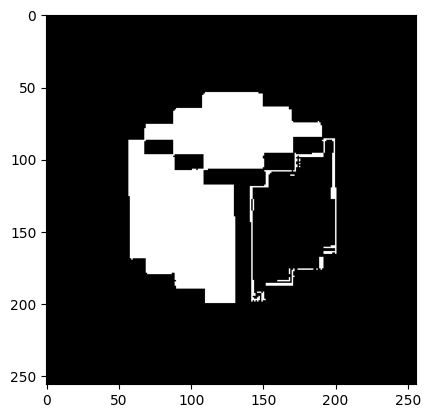

In [292]:
image2 = cv2.imread('IMAGES/chiquita.jpg', 0)

# Dice cual es el rango de valores
plana=[x for y in image2 for x in y]
print(f"el valor máximo es: {max(plana)} y el mínimo es: {min(plana)}")

# Modificando "rango" modificas el umbral
rango = -3
umbral = ((min(plana) + max(plana))/2) + rango
# print(umbral)

# Binarizacion
_, imgBin = cv2.threshold(image2, umbral, 255, cv2.THRESH_BINARY)

#Mostrar img bianria
plt.imshow(imgBin, cmap='gray')

[[255 255   0   0 255 255 255 255]
 [255   0   0   0   0 255 255 255]
 [  0 255 255 255   0   0 255 255]
 [  0   0 255   0 255   0 255 255]
 [  0 255 255 255 255 255   0   0]
 [  0 255 255   0 255 255   0   0]
 [  0 255   0   0   0 255   0   0]
 [255 255 255   0   0   0   0 255]]


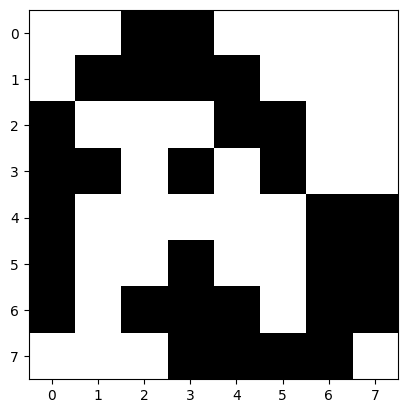

In [293]:
# Matriz de prueba parecida a la del ejercicio de clase
a = 255
b = 0
test = np.array([
        [a, a, b, b, a, a, a, a],
        [a, b, b, b, b, a, a, a],
        [b, a, a, a, b, b, a, a],
        [b, b, a, b, a, b, a, a],
        [b, a, a, a, a, a, b, b],
        [b, a, a, b, a, a, b, b],
        [b, a, b, b, b, a, b, b],
        [a, a, a, b, b, b, b, a]])

print(test)
plt.imshow(test, cmap="gray")

Padre: [ 0 ] [ 0 ]  Valor:( 1.0 ) --> Hijo:[ 0 ] [ 1 ]
Padre: [ 0 ] [ 4 ]  Valor:( 2.0 ) --> Hijo:[ 0 ] [ 5 ]
Padre: [ 0 ] [ 5 ]  Valor:( 2.0 ) --> Hijo:[ 0 ] [ 6 ]
Padre: [ 0 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 0 ] [ 7 ]
Padre: [ 0 ] [ 0 ]  Valor:( 1.0 ) --> Hijo:[ 1 ] [ 0 ]
Padre: [ 0 ] [ 5 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 5 ]
Padre: [ 1 ] [ 5 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 6 ]
Padre: [ 0 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 6 ]
Padre: [ 0 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 6 ]
Padre: [ 1 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 7 ]
Padre: [ 0 ] [ 7 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 7 ]
Padre: [ 0 ] [ 7 ]  Valor:( 2.0 ) --> Hijo:[ 1 ] [ 7 ]
Padre: [ 2 ] [ 1 ]  Valor:( 3.0 ) --> Hijo:[ 2 ] [ 2 ]
Padre: [ 2 ] [ 2 ]  Valor:( 3.0 ) --> Hijo:[ 2 ] [ 3 ]
Padre: [ 1 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 2 ] [ 6 ]
Padre: [ 2 ] [ 6 ]  Valor:( 2.0 ) --> Hijo:[ 2 ] [ 7 ]
Padre: [ 1 ] [ 7 ]  Valor:( 2.0 ) --> Hijo:[ 2 ] [ 7 ]
Padre: [ 1 ] [ 7 ]  Valor:( 2.0 ) --> Hijo:[ 2 ] [ 7 ]
Padre: [ 2

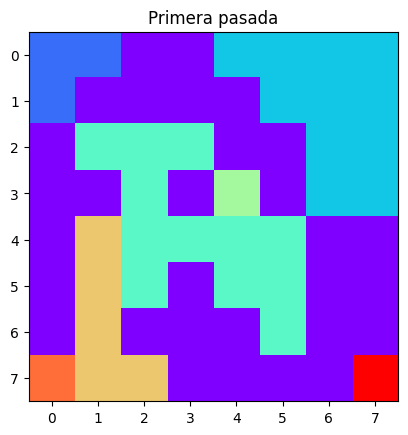

In [296]:
forma2 = np.shape(test)
base2 = np.zeros(forma2)
base3 = np.zeros(forma2)

alto, ancho = forma2

# Primer valor
grupo = 1

# Llenado de valores
for y2 in range(alto):
    for x2 in range(ancho):
        
        if test[y2,x2] == 255: # Si el valor en la matriz es 255 (blanco)
            
            if base2[y2,x2-1] != 0: # Si el valor a la izquierda es diferente de 0, toma ese valor
                base2[y2,x2] = base2[y2,x2-1]
                print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
            
            if base2[y2-1,x2] != 0: # Si el valor arriba es diferente de 0, toma ese valor
                base2[y2,x2] = base2[y2-1,x2]
                print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
            
            # Si los valores tanto arriba como a la izquierda son diferentes de 0, elige el menor
            if (base2[y2,x2-1] != 0) and (base2[y2-1,x2] != 0):
                
                if(base2[y2,x2-1] < base2[y2-1,x2]): # Si el valor a la izquierda es menor, toma ese valor
                    base2[y2,x2] = base2[y2,x2-1]
                    print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
                
                else: # Caso opuesto (entonces el de arriba es menor)
                    base2[y2,x2] = base2[y2-1,x2]
                    print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
            
            # Si el valor es 0 (y no tiene vecinos, porque primero se ve si tiene vecinos (codigo de arriba)) entonces asigna el valor de grupo nuevo
            if base2[y2,x2] == 0:
                base2[y2,x2] = grupo
                grupo = grupo+1

# Imprimir resultado de matriz con sus grupos
print(base2)
plt.title("Primera pasada")
plt.imshow(base2, cmap='rainbow')

[ 0 ] [ 0 ] [1.0, 1.0, 1.0]
min  1.0
[ 0 ] [ 1 ] [1.0, 1.0]
min  1.0
[ 0 ] [ 4 ] [2.0, 2.0]
min  2.0
[ 0 ] [ 5 ] [2.0, 2.0, 2.0, 2.0]
min  2.0
[ 0 ] [ 6 ] [2.0, 2.0, 2.0, 2.0]
min  2.0
[ 0 ] [ 7 ] [2.0, 2.0, 2.0]
min  2.0
[ 1 ] [ 0 ] [1.0, 1.0]
min  1.0
[ 1 ] [ 5 ] [2.0, 2.0, 2.0]
min  2.0
[ 1 ] [ 6 ] [2.0, 2.0, 2.0, 2.0, 2.0]
min  2.0
[ 1 ] [ 7 ] [2.0, 2.0, 2.0, 2.0]
min  2.0
[ 2 ] [ 1 ] [3.0, 3.0]
min  3.0
[ 2 ] [ 2 ] [3.0, 3.0, 3.0, 3.0]
min  3.0
[ 2 ] [ 3 ] [3.0, 3.0]
min  3.0
[ 2 ] [ 6 ] [2.0, 2.0, 2.0, 2.0]
min  2.0
[ 2 ] [ 7 ] [2.0, 2.0, 2.0, 2.0]
min  2.0
[ 3 ] [ 2 ] [3.0, 3.0, 3.0]
min  3.0
[ 3 ] [ 4 ] [4.0, 3.0]
min  3.0
[ 3 ] [ 6 ] [2.0, 2.0, 2.0]
min  2.0
[ 3 ] [ 7 ] [2.0, 2.0, 2.0]
min  2.0
[ 4 ] [ 1 ] [5.0, 3.0, 5.0]
min  3.0
[ 4 ] [ 2 ] [3.0, 3.0, 3.0, 3.0, 5.0]
min  3.0
[ 4 ] [ 3 ] [3.0, 3.0, 3.0]
min  3.0
[ 4 ] [ 4 ] [3.0, 4.0, 3.0, 3.0, 3.0]
min  3.0
[ 4 ] [ 5 ] [3.0, 3.0, 3.0]
min  3.0
[ 5 ] [ 1 ] [5.0, 5.0, 3.0, 5.0]
min  3.0
[ 5 ] [ 2 ] [3.0, 3.0, 5.0]
min  3.0
[ 5

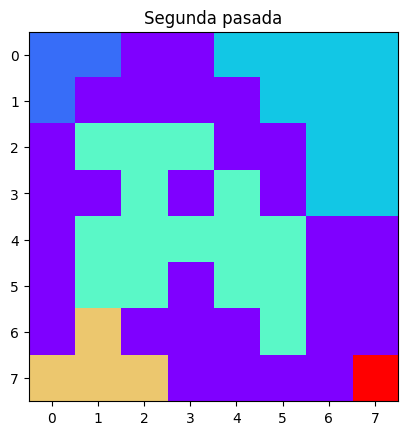

In [295]:
for y2 in range(alto):
    for x2 in range(ancho):
        
        lista = []
        
        if base3[y2,x2] != 0:
            
            lista.append(base3[y2,x2])                
                
            if(y2>0) and (base3[y2-1][x2] != 0):
                #[^] Vecino de arriba:
                lista.append(base3[y2-1][x2])
                
            if(x2<(ancho-1)) and (base3[y2][x2+1] != 0):
                #[->] Vecino de la derecha
                lista.append(base3[y2][x2+1])
            
            if(y2<(alto-1)) and (base3[y2+1][x2] != 0):
                #[v] Vecino de abajo
                lista.append(base3[y2+1][x2])
                
            if(x2>0) and (base3[y2][x2-1] != 0):
                #[<-] Vecino de la izquierda
                lista.append(base3[y2][x2-1])

            print("[",y2,"]","[",x2,"]",lista)
            
            print("min ",min(lista))
            
            base3[y2,x2] = min(lista)

print(base2)
print(base3)
plt.title("Segunda pasada")
plt.imshow(base3, cmap="rainbow")

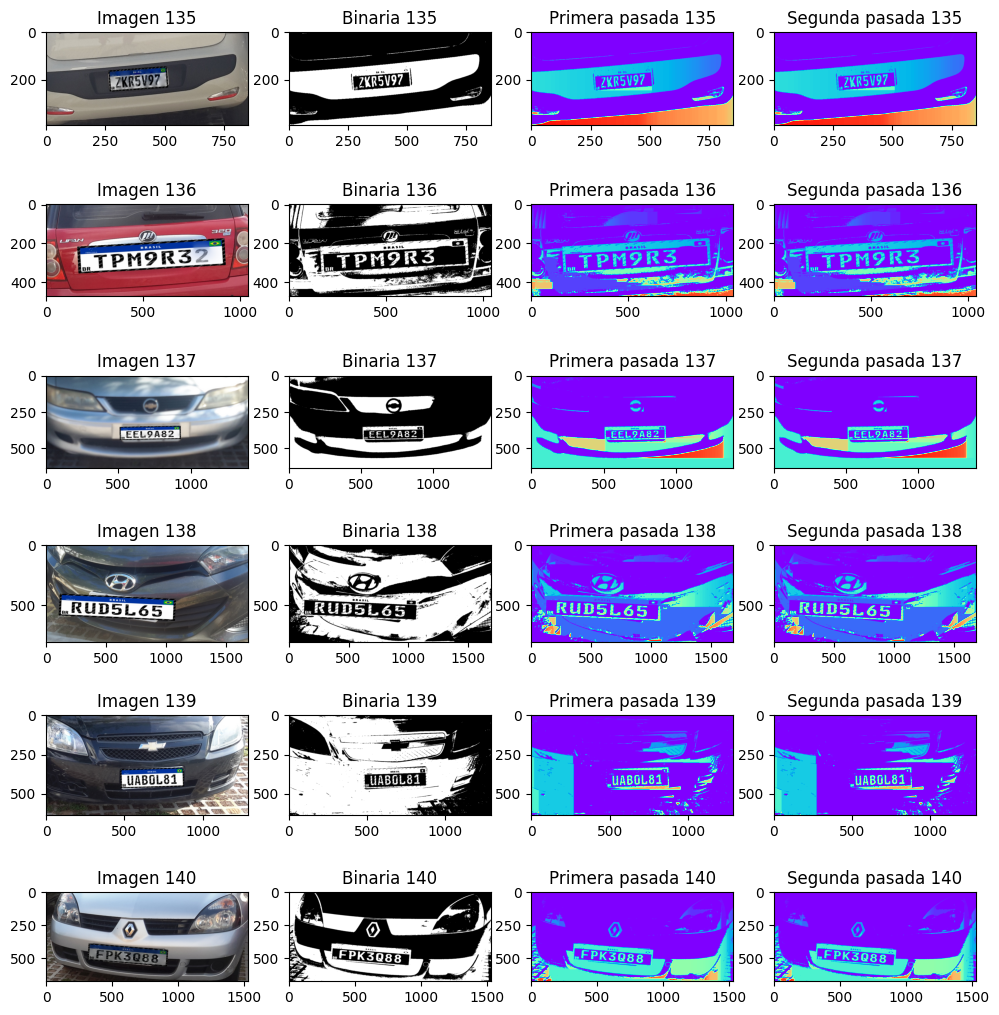

In [290]:
"""# Mostrar resultados
fig, ax = plt.subplots(6,4, figsize=(12, 13))
axis = 0

for i in range(135,141):
    
    #Imagen de entrada
    ruta = '../../IMAGES/DATASET_IMAGES/ArtificialMercosurLicensePlates/cropped_parking_lot_'
    image2 = cv2.imread(ruta + '%03d.jpg' %i, 0)
    
    #Original
    BRG = cv2.imread(ruta + '%03d.jpg' %i, 1)
    imagen_rgb = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
    ax[axis,0].set_title('Imagen ' + '%03d' %i)
    ax[axis,0].imshow(imagen_rgb)
    
    #Binaria
    foto = bin(image2, -40)
    ax[axis,1].set_title('Binaria ' + '%03d' %i)
    ax[axis,1].imshow(foto,cmap='gray')
    
    #Pasada1
    foto2 = pasada1(foto)
    ax[axis,2].set_title('Primera pasada '+ '%03d' %i)
    ax[axis,2].imshow(foto2,cmap='rainbow')
    
    #Pasada2
    foto3 = pasada2(foto2)
    ax[axis,3].set_title('Segunda pasada '+ '%03d' %i)
    ax[axis,3].imshow(foto3,cmap='rainbow')
    
    axis = axis+1   
    """